In [5]:
import pandas as pd
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt


In [6]:
    cars=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')

In [7]:
toyota=cars[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [8]:
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


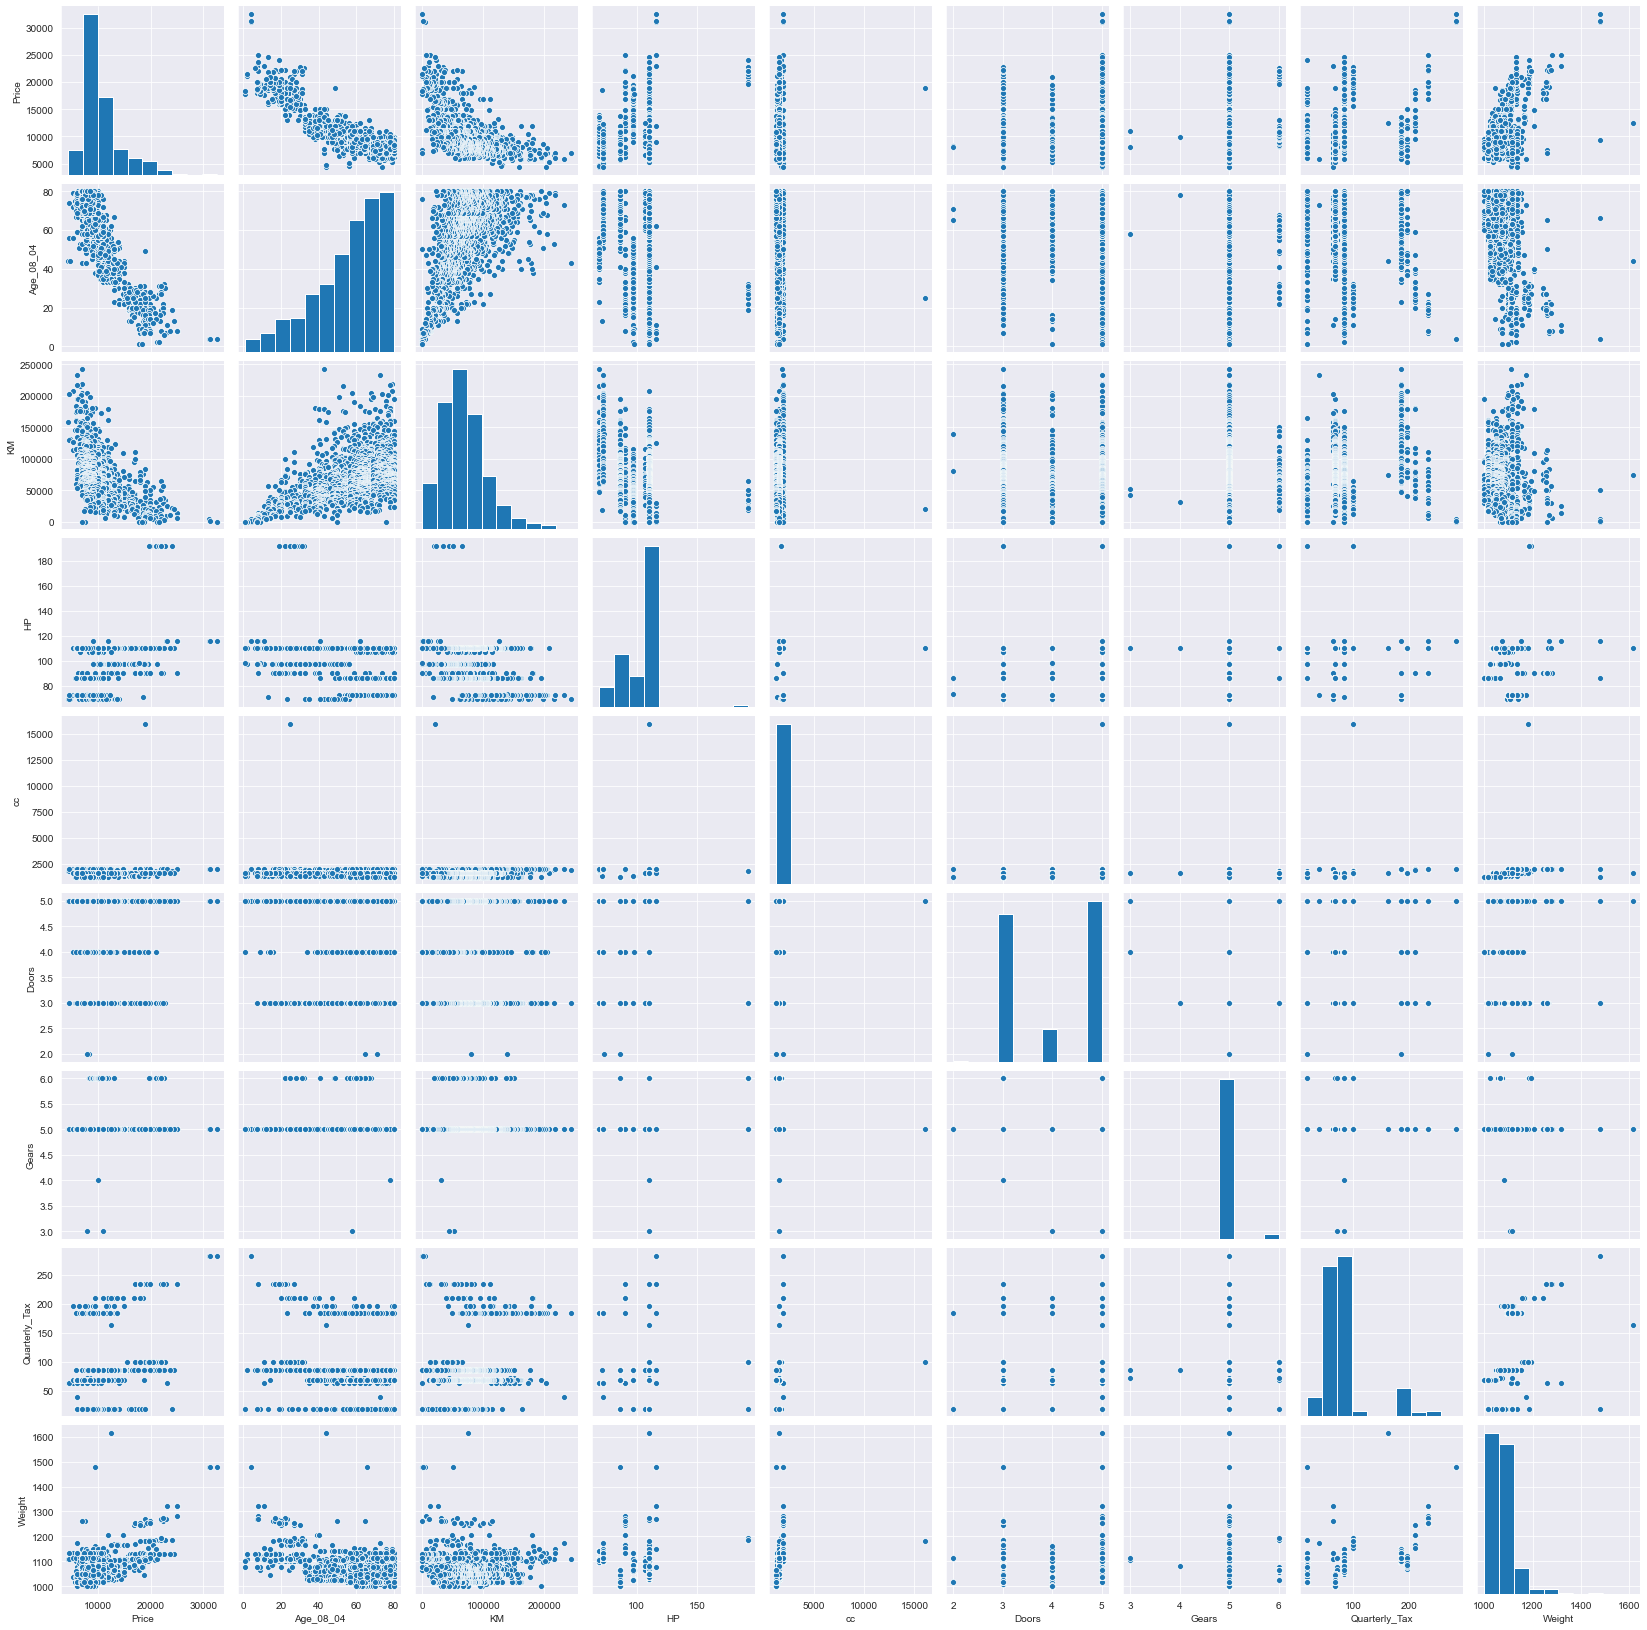

In [6]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(toyota)

In [9]:
import statsmodels.formula.api as smf
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        06:22:29   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model_cc=smf.ols('Price~cc',data=toyota).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.55e-06
Time:                        06:22:35   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model_door=smf.ols('Price~Doors',data=toyota).fit()
model_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.46e-12
Time:                        12:25:44   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model_doorncc=smf.ols('Price~Doors+cc',data=toyota).fit()
model_doorncc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.15e-15
Time:                        12:26:19   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
ml_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_age=1/(1-ml_age)

In [13]:
vif_age

1.8846198056602865

In [14]:
ml_km=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_km=1/(1-ml_km)

In [15]:
ml_hp=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_hp=1/(1-ml_hp)

In [16]:
ml_cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_cc=1/(1-ml_cc)

In [22]:
ml_door=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_door=1/(1-ml_door)

In [24]:
ml_gear=smf.ols('Gears~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_gear=1/(1-ml_gear)

<ipython-input-24-dcb612af4f4c>:2: RuntimeWarning: divide by zero encountered in double_scalars
  vif_gear=1/(1-ml_gear)


In [19]:
ml_qtax=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyota).fit().rsquared
vif_qtax=1/(1-ml_qtax)

In [26]:
ml_weight=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=toyota).fit().rsquared
vif_weight=1/(1-ml_weight)

In [27]:
d1={'variables':['Age','KM','HP','CC','Doors','Gears','Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_door,vif_gear,vif_qtax,vif_weight]}
pd.DataFrame(d1)

,variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.156575
4,Doors,1.156575
5,Gears,inf
6,Tax,2.311431
7,Weight,2.516420


In [38]:
import statsmodels.formula.api as smf
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight+Gears+Doors',data=toyota).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        06:33:21   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Residual analysis

res=model2.resid
res

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

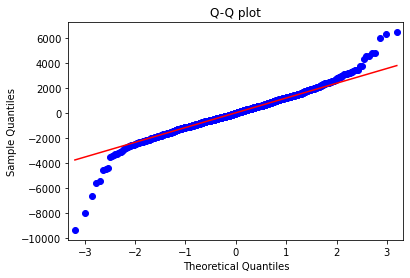

In [41]:
import statsmodels.api as sm
qplot=sm.qqplot(res, line='q')
plt.title('Q-Q plot')
plt.show

In [44]:
list(np.where(model2.resid<-4500))

[array([191, 192, 221, 402, 601, 960], dtype=int64)]

In [87]:
# Residual plot for homoscadaticity
def standardization (values):
    return(values-values.mean())/values.std()

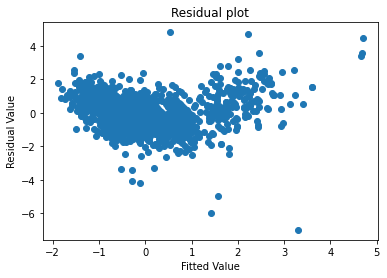

In [88]:
plt.scatter(standardization(model2.fittedvalues),
           standardization(model2.resid))
plt.title("Residual plot")
plt.xlabel("Fitted Value")
plt.ylabel("Residual Value")
plt.show()

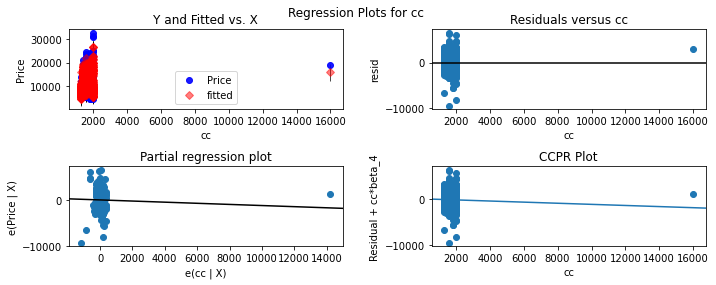

In [91]:
fig=plt.figure(figsize=(10,4))
fig=sm.graphics.plot_regress_exog(model2,"cc",fig=fig)

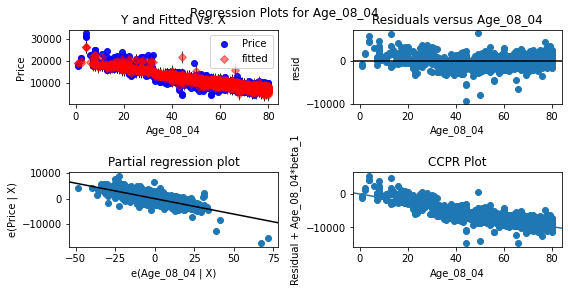

In [67]:
fig=plt.figure(figsize=(8,4))
fig=sm.graphics.plot_regress_exog(model2,"Age_08_04",fig=fig)

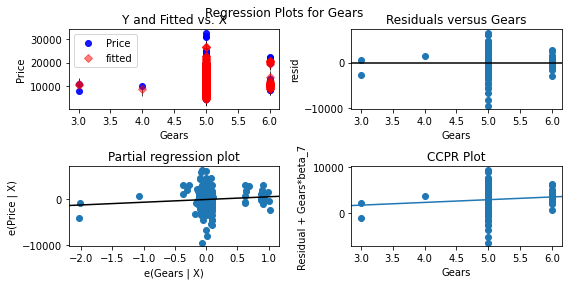

In [93]:
fig=plt.figure(figsize=(8,4))
fig=sm.graphics.plot_regress_exog(model2,"Gears",fig=fig)

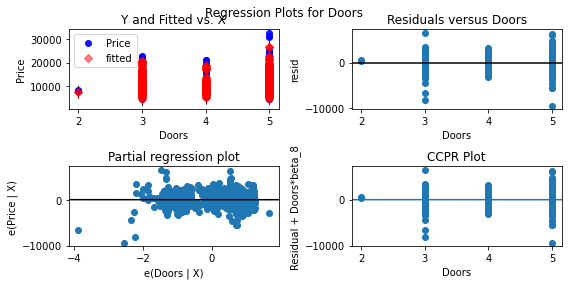

In [94]:
fig=plt.figure(figsize=(8,4))
fig=sm.graphics.plot_regress_exog(model2,"Doors",fig=fig)

In [120]:
import statsmodels.formula.api as smf
model3=smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight+Gears',data=toyota).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:28:38   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#model deletion dignostics
model_influence=model3.get_influence()
(c,_)=model_influence.cooks_distance
c;

<ipython-input-97-d5b88832b2de>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota)),np.round(c,3))


<function matplotlib.pyplot.show(*args, **kw)>

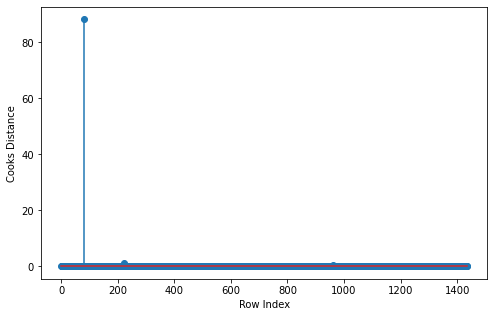

In [97]:
fig=plt.subplots(figsize=(8,5))
plt.stem(np.arange(len(toyota)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel('Cooks Distance')
plt.show

In [74]:
np.argmax(c),np.max(c)

(80, 79.52010624138654)

<function matplotlib.pyplot.show(*args, **kw)>

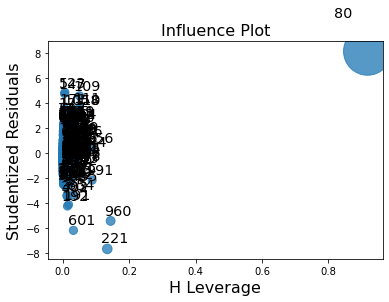

In [99]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model3)
plt.show

In [100]:
c

array([6.96739575e-03, 3.75784888e-03, 5.28338875e-03, ...,
       9.42322432e-07, 7.44544703e-04, 1.20232081e-02])

In [101]:
# we'lll cross check influencial value with help of forumla

k=toyota.shape[1]
n=toyota.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020891364902506964

In [ ]:
# leverage_cut off o/p is 0.02089 and we have only 1 data point for >0.02089 in above plot i.e. 80

In [102]:
toyota[toyota.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [103]:
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
#improving the model by deleting influential recored as row no. 80 is showing cc 16000 which is too different

In [104]:
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [108]:
toyota_1=toyota.drop(toyota.index[[80]],axis=0).reset_index()

In [109]:
toyota_1

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


<Figure size 2880x576 with 0 Axes>

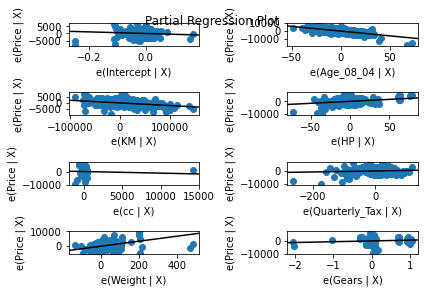

In [122]:
fig=plt.figure(figsize=(40,8))
fig=sm.graphics.plot_partregress_grid(model3)

In [128]:
#building final model

final_model_1=smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight+Gears',data=toyota_1).fit()

In [129]:
final_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:41:31   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# checking for further influential points, not checking further R square/Aic value due to p-value is under limit

In [139]:
influencial_points=final_model_1.get_influence()
(influ, _)=influencial_points.cooks_distance

<ipython-input-140-5353518d52c3>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota_1)),np.round(influ,3))


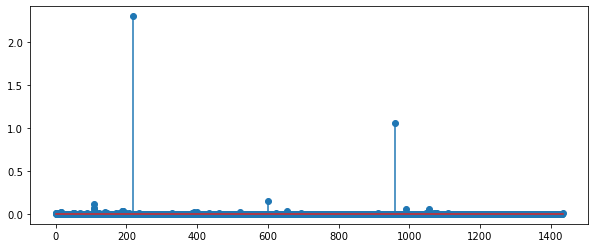

In [140]:
fig=plt.subplots(figsize=(10,4))
plt.stem(np.arange(len(toyota_1)),np.round(influ,3))
plt.show()

In [134]:
np.argmax(influ), np.max(influ)

(220, 2.3034451664540763)

<function matplotlib.pyplot.show(*args, **kw)>

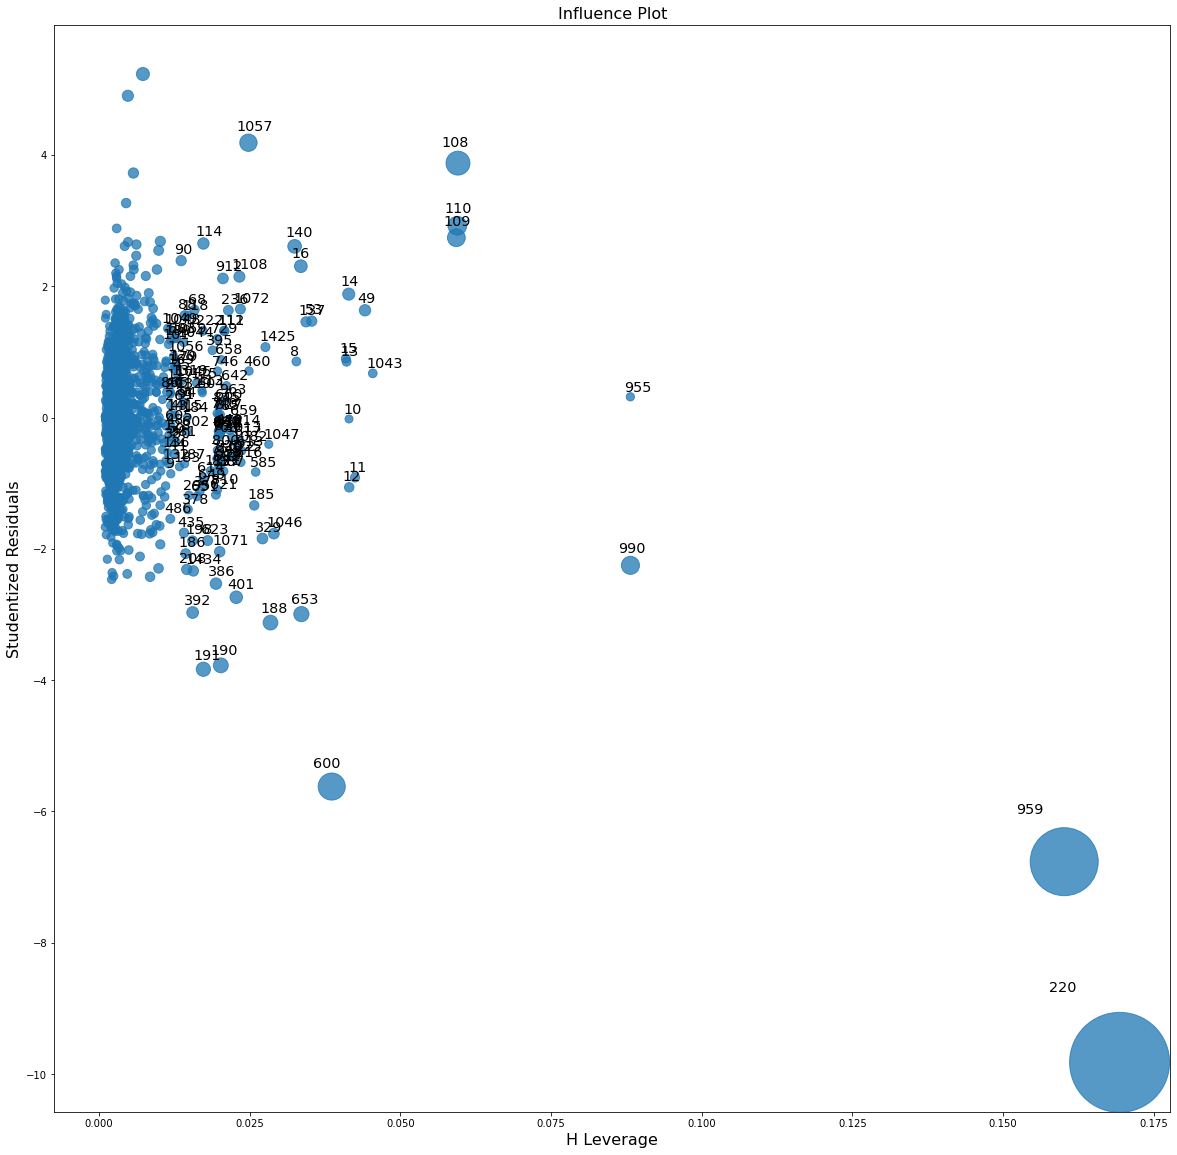

In [177]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot((final_model_1),alpha=500,size=100).figsize=(400,200)
plt.rcParams["figure.figsize"]=(10,10)
plt.show

In [142]:
k=toyota_1.shape[1]
n=toyota_1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.022996515679442508

In [179]:
toyota_1[toyota_1.index.isin([108,109,110,990,955,959,220,600,653,10,11,12,1043,13,14,15,49,1043,49])]

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
10,10,20950,25,31461,192,1800,3,6,100,1185
11,11,19950,22,43610,192,1800,3,6,100,1185
12,12,19600,25,32189,192,1800,3,6,100,1185
13,13,21500,31,23000,192,1800,3,6,100,1185
14,14,22500,32,34131,192,1800,3,6,100,1185
15,15,22000,28,18739,192,1800,3,6,100,1185
49,49,21950,31,64982,192,1800,5,6,100,1195
108,109,32500,4,1,116,2000,5,5,283,1480
109,110,31000,4,4000,116,2000,5,5,283,1480
110,111,31275,4,1500,116,2000,5,5,283,1480


In [180]:
toyota_1

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [189]:
toyota_2=toyota_1.drop(toyota_1.index[[108,109,110,990,955,959,220,600,653,10,11,12,1043,13,14,15,49,1043,49]],axis=0).reset_index()
toyota_2

,level_0,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1413,1430,1431,7500,69,20544,86,1300,3,5,69,1025
1414,1431,1432,10845,72,19000,86,1300,3,5,69,1015
1415,1432,1433,8500,71,17016,86,1300,3,5,69,1015
1416,1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [197]:
toyota_3=toyota_2.drop(['level_0','index'],axis=1)


In [198]:
toyota_3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1413,7500,69,20544,86,1300,3,5,69,1025
1414,10845,72,19000,86,1300,3,5,69,1015
1415,8500,71,17016,86,1300,3,5,69,1015
1416,7250,70,16916,86,1300,3,5,69,1015


In [206]:

final_model_2=smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight+Gears',data=toyota_3).fit()

In [207]:
final_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1452.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:52:28   Log-Likelihood:                -12061.
No. Observations:                1418   AIC:                         2.414e+04
Df Residuals:                    1410   BIC:                         2.418e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.428e+04   1625.112     -8.788      0.000   -1.75e+04   -1.11e+04
Age_08_04      -111.1155      2.476    -44.884      0.000    -115.972    -106.259
KM               -0.0178      0.001    -14.995      0.000      -0.020      -0.015
HP               30.7559      2.950     10.427      0.000      24.970      36.542
cc               -3.2445      0.306    -10.592      0.000      -3.845      -2.644
Quarterly_Tax     2.4777      1.401      1.769      0.077      -0.270       5.225
Weight           30.2008      1.350     22.365      0.000      27.552      32.850
Gears           363.7907    200.955      1.810      0.070     -30.413     757.994
==============================================================================
Omnibus:                       70.509   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.108
Skew:                           0.172   Prob(JB):                     1.44e-46
Kurtosis:                       4.859   Cond. No.                     4.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
toyota_3.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.884179,-0.573473,0.251996,0.134104,0.194100,-0.017186,0.168245,0.579569
Age_08_04,-0.884179,1.000000,0.499042,-0.116293,-0.114799,-0.150417,0.040757,-0.172882,-0.489617
KM,-0.573473,0.499042,1.000000,-0.334729,0.319767,-0.040634,0.034358,0.313003,0.011278
HP,0.251996,-0.116293,-0.334729,1.000000,0.015068,0.124735,0.086197,-0.366514,0.020065
cc,0.134104,-0.114799,0.319767,0.015068,1.000000,0.129978,0.015787,0.685290,0.713490
Doors,0.194100,-0.150417,-0.040634,0.124735,0.129978,1.000000,-0.158735,0.101086,0.352513
Gears,-0.017186,0.040757,0.034358,0.086197,0.015787,-0.158735,1.000000,-0.018746,-0.026393
Quarterly_Tax,0.168245,-0.172882,0.313003,-0.366514,0.685290,0.101086,-0.018746,1.000000,0.665010
Weight,0.579569,-0.489617,0.011278,0.020065,0.713490,0.352513,-0.026393,0.665010,1.000000


In [210]:
#once again check for cook's distance
influence_points=final_model_2.get_influence()
(influ_final,_)=influence_points.cooks_distance

<ipython-input-211-b51e149e8548>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota_3)),np.round(influ_final,3))


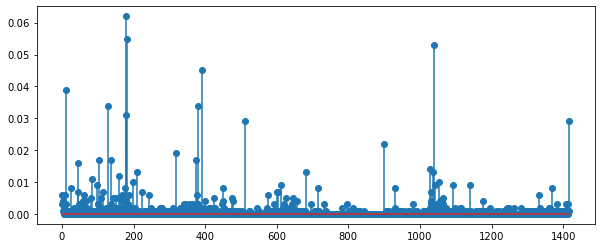

In [211]:

fig=plt.subplots(figsize=(10,4))
plt.stem(np.arange(len(toyota_3)),np.round(influ_final,3))
plt.show()

In [212]:
np.argmax(influ_final),np.max(influ_final)

(180, 0.06214403676312002)

<function matplotlib.pyplot.show(*args, **kw)>

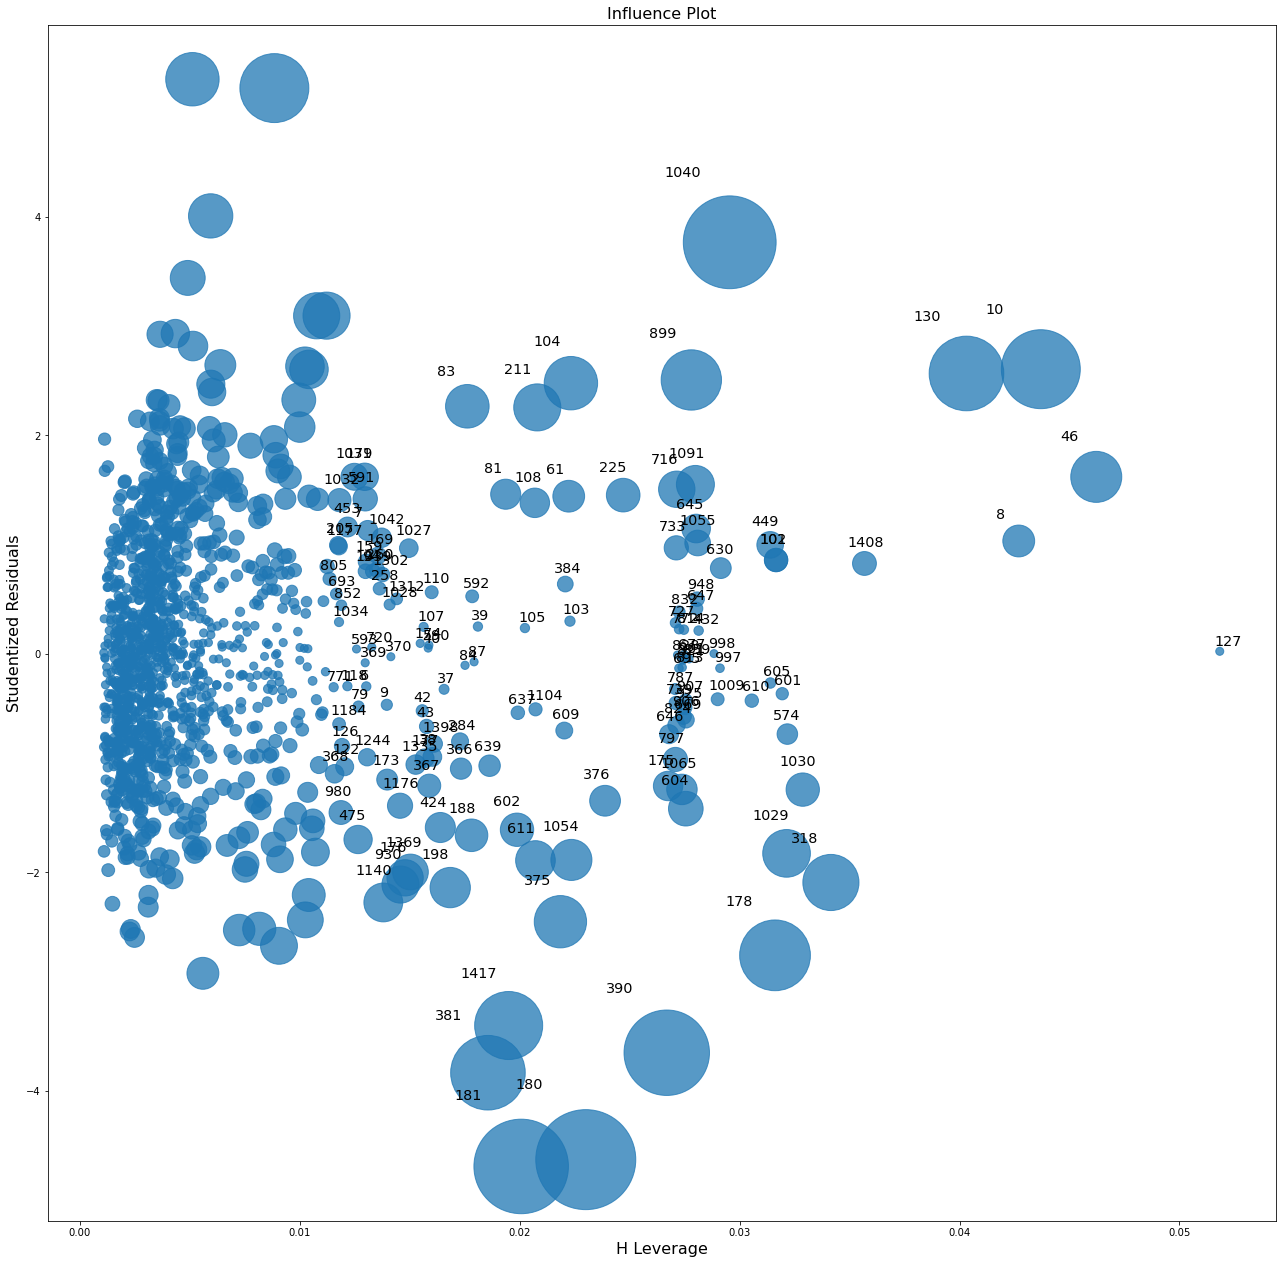

In [240]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot((final_model_2),alpha=500,size=100).figsize=(400,200)
plt.rcParams["figure.figsize"]=(23,23)
plt.show

In [217]:
k=toyota_3.shape[1]
n=toyota_3.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.021156558533145277

In [242]:
#just to check input in rows beyond 0.0211
toyota_3[toyota_3.index.isin([127,46,8,130,10,1408,1040,899,318,645,180,182,390,178,948,1029])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
8,21500,27,19700,192,1800,3,5,100,1185
10,22750,30,34000,192,1800,3,5,100,1185
46,21950,27,49866,192,1800,5,5,100,1195
127,23000,11,25000,116,2000,5,5,64,1320
130,23950,19,21684,192,1800,5,5,19,1185
178,7750,43,178858,110,1600,3,5,197,1084
180,4350,44,158320,69,1800,5,5,64,1110
182,11750,40,130062,69,1900,5,5,185,1140
318,11000,41,33000,110,1600,5,6,19,1075
390,5150,56,113997,72,2000,5,5,64,1135


In [224]:
toyota_3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1413,7500,69,20544,86,1300,3,5,69,1025
1414,10845,72,19000,86,1300,3,5,69,1015
1415,8500,71,17016,86,1300,3,5,69,1015
1416,7250,70,16916,86,1300,3,5,69,1015


In [243]:
toyota_4=toyota_3.drop(toyota_3.index[[127,46,8,130,10,1408,1040,899,318,645,180,182,390,178,948,1029]],axis=0).reset_index()
toyota_4

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1397,1413,7500,69,20544,86,1300,3,5,69,1025
1398,1414,10845,72,19000,86,1300,3,5,69,1015
1399,1415,8500,71,17016,86,1300,3,5,69,1015
1400,1416,7250,70,16916,86,1300,3,5,69,1015


In [244]:
toyota_4=toyota_4.drop(['index'],axis=1)

In [245]:
toyota_4

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1397,7500,69,20544,86,1300,3,5,69,1025
1398,10845,72,19000,86,1300,3,5,69,1015
1399,8500,71,17016,86,1300,3,5,69,1015
1400,7250,70,16916,86,1300,3,5,69,1015


In [246]:
final_model_4=smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight+Gears+Doors',data=toyota_4).fit()
final_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1289.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:04:17   Log-Likelihood:                -11880.
No. Observations:                1402   AIC:                         2.378e+04
Df Residuals:                    1393   BIC:                         2.383e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.395e+04   1670.110     -8.354      0.000   -1.72e+04   -1.07e+04
Age_08_04      -111.7407      2.432    -45.939      0.000    -116.512    -106.969
KM               -0.0171      0.001    -14.523      0.000      -0.019      -0.015
HP               27.4893      3.229      8.514      0.000      21.155      33.823
cc               -3.3162      0.313    -10.599      0.000      -3.930      -2.702
Quarterly_Tax     1.5311      1.450      1.056      0.291      -1.313       4.375
Weight           31.5962      1.464     21.583      0.000      28.724      34.468
Gears           209.5969    213.470      0.982      0.326    -209.161     628.355
Doors          -132.7799     37.269     -3.563      0.000    -205.890     -59.670
==============================================================================
Omnibus:                       74.707   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.121
Skew:                           0.251   Prob(JB):                     1.29e-44
Kurtosis:                       4.791   Cond. No.                     4.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
#once again check for cook's distance
influence_points_01=final_model_4.get_influence()
(influ_final01,_)=influence_points_01.cooks_distance

<ipython-input-248-68b1d5de04b6>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota_4)),np.round(influ_final01,3))


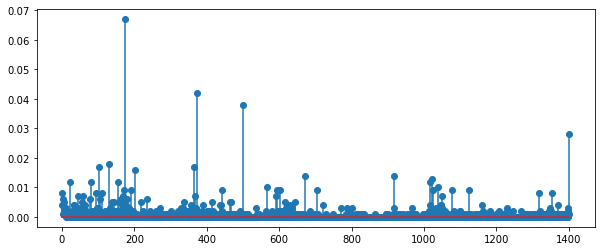

In [248]:
fig=plt.subplots(figsize=(10,4))
plt.stem(np.arange(len(toyota_4)),np.round(influ_final01,3))
plt.show()

In [249]:
np.argmax(influ_final01),np.max(influ_final01)

(174, 0.06703089063207102)

C:\Users\pankshar\Anaconda3\lib\site-packages\statsmodels\graphics\regressionplots.py:888: RuntimeWarning: invalid value encountered in greater
  large_resid = np.abs(resids) > cutoff


<function matplotlib.pyplot.show(*args, **kw)>

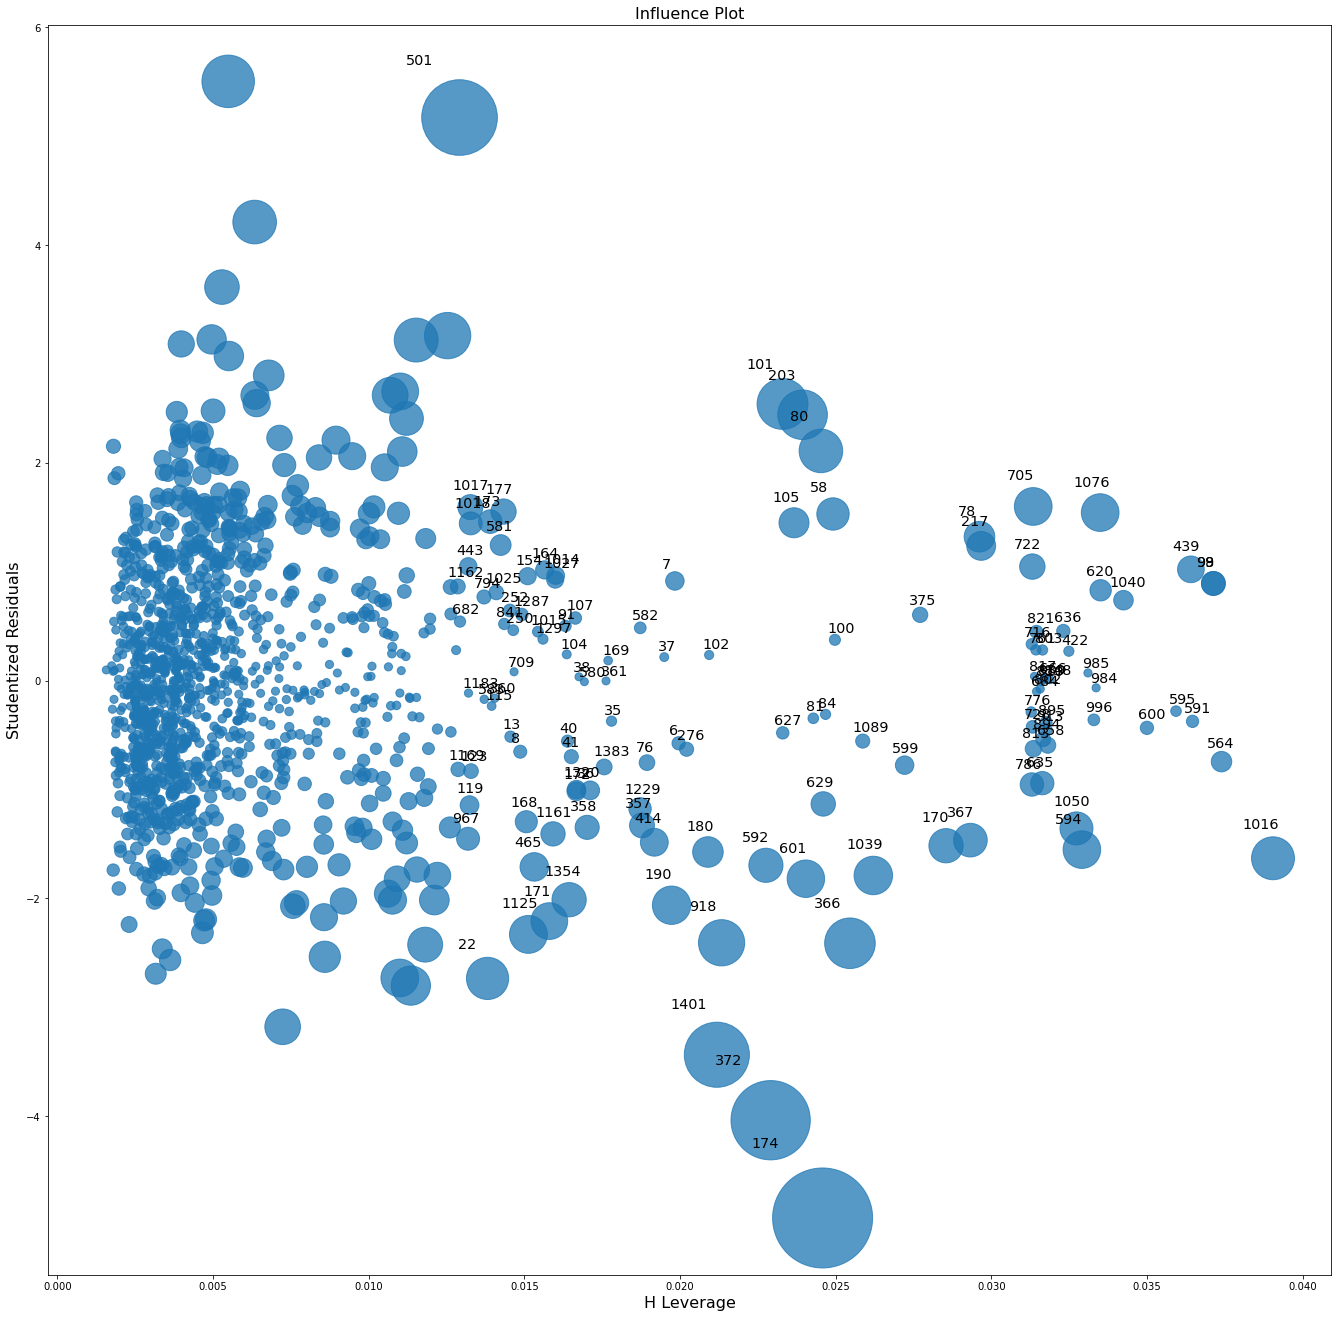

In [250]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot((final_model_4),alpha=500,size=100).figsize=(400,200)
plt.rcParams["figure.figsize"]=(23,23)
plt.show

In [251]:
k=toyota_4.shape[1]
n=toyota_4.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.021398002853067047

In [256]:
#just to check input in rows beyond 0.0213
toyota_4[toyota_4.index.isin([174,372,1401,366,101,203,1016,594,1050,1039,1076,705,599,1089])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
101,24990,8,6000,90,2000,5,5,234,1280
174,4750,44,131273,69,1800,5,5,64,1110
203,14950,44,71793,110,1600,4,5,197,1067
366,9250,48,142130,110,1600,5,5,197,1119
372,4450,56,129155,69,1800,5,5,64,1110
594,6900,59,144521,72,2000,5,5,64,1135
599,8950,59,137050,110,1600,3,5,197,1078
705,11500,65,85889,110,1600,3,6,85,1065
1016,4400,74,203254,72,2000,3,5,64,1135
1039,6450,71,151000,110,1600,5,5,197,1094


In [257]:
toyota_5=toyota_4.drop(toyota_4.index[[174,372,1401,366,101,203,1016,594,1050,1039,1076,705,599,1089]],axis=0).reset_index()
toyota_5

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1383,1396,8450,80,23000,86,1300,3,5,69,1015
1384,1397,7500,69,20544,86,1300,3,5,69,1025
1385,1398,10845,72,19000,86,1300,3,5,69,1015
1386,1399,8500,71,17016,86,1300,3,5,69,1015


In [258]:
final_model_5=smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight+Gears+Doors',data=toyota_5).fit()
final_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1333.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:20:25   Log-Likelihood:                -11723.
No. Observations:                1388   AIC:                         2.346e+04
Df Residuals:                    1379   BIC:                         2.351e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.462e+04   1658.888     -8.814      0.000   -1.79e+04   -1.14e+04
Age_08_04      -111.9258      2.387    -46.894      0.000    -116.608    -107.244
KM               -0.0164      0.001    -14.045      0.000      -0.019      -0.014
HP               22.4126      3.445      6.505      0.000      15.654      29.171
cc               -2.9931      0.322     -9.299      0.000      -3.624      -2.362
Quarterly_Tax    -1.5086      1.608     -0.938      0.348      -4.663       1.645
Weight           32.5563      1.450     22.449      0.000      29.711      35.401
Gears           175.9091    210.956      0.834      0.405    -237.921     589.739
Doors          -119.2688     36.457     -3.272      0.001    -190.785     -47.752
==============================================================================
Omnibus:                       78.042   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.618
Skew:                           0.375   Prob(JB):                     5.94e-35
Kurtosis:                       4.470   Cond. No.                     4.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [259]:
pred_y=final_model_5.predict(cars)
pred_y

0       16199.862683
1       15775.215937
2       16174.253834
3       15847.492746
4       15718.023389
            ...     
1431     9144.285595
1432     8508.210162
1433     8652.600974
1434     8766.163129
1435    11071.348665
Length: 1436, dtype: float64